# Q-network


In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
def one_hot(x, n):
    return np.identity(n)[x:x+1]

def reinforcement_learning(env):

    input_size = env.observation_space.n
    output_size = env.action_space.n
    learning_rate = 0.1

    X = tf.placeholder(shape=(1, input_size), dtype=tf.float32)
    W = tf.Variable(tf.random_uniform((input_size, output_size), 0, 0.01))
    Qpred = tf.matmul(X, W)

    Y = tf.placeholder(shape=(1, output_size), dtype=tf.float32)
    loss = tf.reduce_sum(tf.square(Y - Qpred))
    train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

    dis = 0.99
    num_episodes = 2000

    result_list = []

    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        for i in range(num_episodes):
            if i % 50 == 0:
                print(i)
            state = env.reset()
            e = 1 / ((i / 50) + 10)
            rAll = 0
            done = False
            # local_loss = []

            while not done:
                Qs = sess.run(Qpred, feed_dict={X: one_hot(state, input_size)})
                if np.random.rand(1) < e:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Qs)
                next_state, reward, done, _ = env.step(action)
                if done:
                    Qs[0, action] = reward
                else:
                    Qs1 = sess.run(Qpred, feed_dict={X: one_hot(next_state, input_size)})
                    Qs[0, action] = reward + dis * np.max(Qs1)
                train.run(feed_dict={X: one_hot(state, input_size), Y: Qs})

                rAll += reward
                state = next_state

            result_list.append(rAll)
    return result_list

# Frozen Lake

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
0.5115


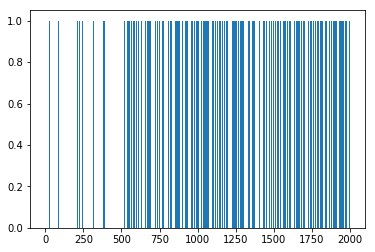

In [27]:
try:
    gym.make('FrozenLake-v3')
except:
    gym.envs.registration.register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={
            'map_name': '4x4',
            'is_slippery': True # This option is mandatory for dummy algorithm
        }
    )

frozenLake = gym.make('FrozenLake-v3')

result_list = reinforcement_learning(frozenLake)

print(sum(result_list) / len(result_list))
plt.bar(list(range(len(result_list))), result_list)
plt.show()

# Cart Pole

22.2175


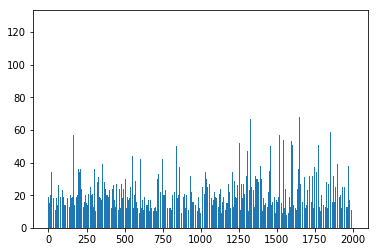

In [53]:
cartPole = gym.make('CartPole-v1')
env = cartPole

result_list = []

for i in range(2000):
    env.reset()
    reward_sum = 0
    done = False
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        reward_sum += reward
    result_list.append(reward_sum)

print(sum(result_list) / len(result_list))
plt.bar(list(range(len(result_list))), result_list)
plt.show()

In [62]:
import time

def reinforcement_learning(env):
    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n
    learning_rate = 0.1

    X = tf.placeholder(shape=(1, input_size), dtype=tf.float32)
    W = tf.get_variable(name='W_{}'.format(time.time()), shape=(input_size, output_size), initializer=tf.contrib.layers.xavier_initializer())
    Qpred = tf.matmul(X, W)

    Y = tf.placeholder(shape=(1, output_size), dtype=tf.float32)
    loss = tf.reduce_sum(tf.square(Y - Qpred))
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    dis = 0.99
    num_episodes = 2000

    result_list = []

    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        for i in range(num_episodes):
            if i % 50 == 0:
                print(i)
            state = env.reset()
            e = 1 / ((i / 50) + 10)
            rAll = 0
            done = False
            # local_loss = []

            while not done:
                Qs = sess.run(Qpred, feed_dict={X: state.reshape(1, 4)})
                if np.random.rand(1) < e:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Qs)
                next_state, reward, done, _ = env.step(action)
                if done:
                    Qs[0, action] = -100
                else:
                    Qs1 = sess.run(Qpred, feed_dict={X: next_state.reshape(1, 4)})
                    Qs[0, action] = reward + dis * np.max(Qs1)
                train.run(feed_dict={X: state.reshape(1, 4), Y: Qs})

                rAll += reward
                state = next_state

            result_list.append(rAll)
    return result_list

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
26.063


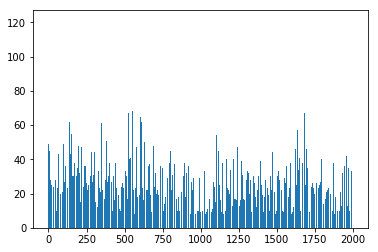

In [63]:
result_list = reinforcement_learning(cartPole)

print(sum(result_list) / len(result_list))
plt.bar(list(range(len(result_list))), result_list)
plt.show()